# CS-651-A TEXT BASED ANALYSIS
# Sai Vandana - 0939231
# Mid term exam 

## Reading the CSV file 

In [1]:
import pandas as pd
df = pd.read_csv(r"tweet_emotions.csv")
df.head(10)


,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


## Performing statistical operations 

In [68]:
df.isnull().sum()

tweet_id           0
sentiment          0
content            0
content_cleaned    0
word_count         0
tokens             0
num_tokens         0
processed_text     0
length             0
Subjectivity       0
Polarity           0
dtype: int64

In [35]:
df.dtypes

tweet_id            int64
sentiment          object
content            object
content_cleaned    object
word_count          int64
tokens             object
num_tokens          int64
processed_text     object
dtype: object

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         40000 non-null  int64 
 1   sentiment        40000 non-null  object
 2   content          40000 non-null  object
 3   content_cleaned  40000 non-null  object
 4   word_count       40000 non-null  int64 
 5   tokens           40000 non-null  object
 6   num_tokens       40000 non-null  int64 
 7   processed_text   40000 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.4+ MB


In [40]:
df['length'] = df['content'].str.len()
df.describe()

,tweet_id,word_count,num_tokens,length
count,4.000000e+04,40000.000000,40000.000000,40000.000000
mean,1.845184e+09,58.499475,7.684675,73.405550
std,1.188579e+08,30.365619,3.965935,36.558015
min,1.693956e+09,1.000000,0.000000,1.000000
25%,1.751431e+09,33.000000,4.000000,43.000000
50%,1.855443e+09,54.500000,7.000000,69.000000
75%,1.962781e+09,83.000000,11.000000,103.000000
max,1.966441e+09,218.000000,34.000000,167.000000


## Creating various plots to understand the data better


This code creates a line plot of the data in the column 'length'. A line plot is useful for visualizing the change in a variable over time or in sequence. It connects data points with a continuous line, making it easy to see trends, fluctuations, and patterns.

<Axes: >

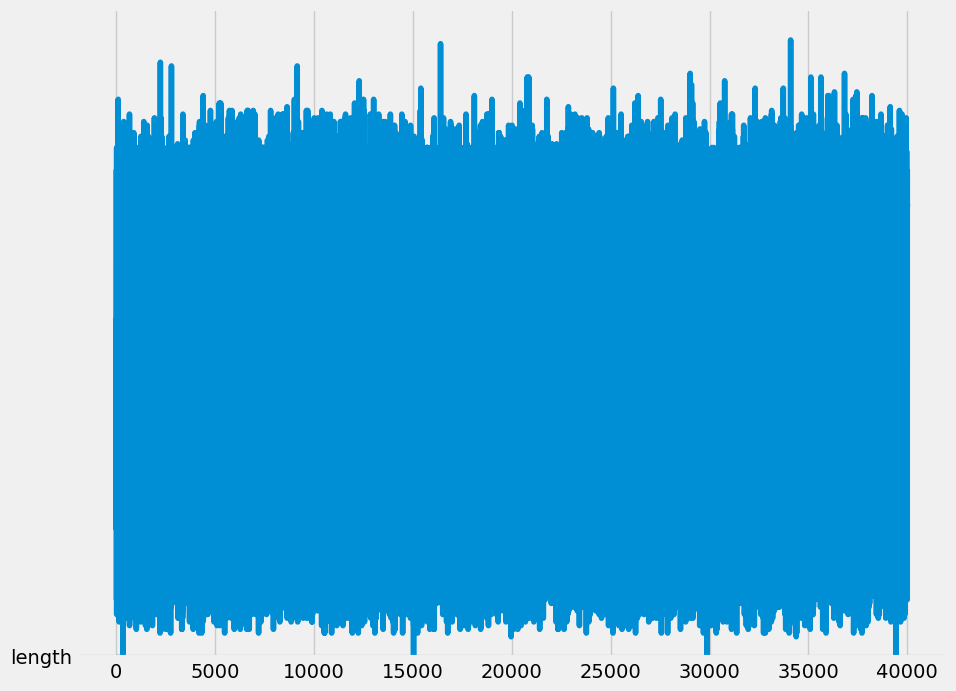

In [66]:
df['length'].plot()
df['length'].plot(kind='box', vert=False)

 This code generates a box plot with the orientation set to horizontal. This box plot provides a graphical representation of the central tendency and variability of the data. It shows the median, quartiles, and possible outliers.

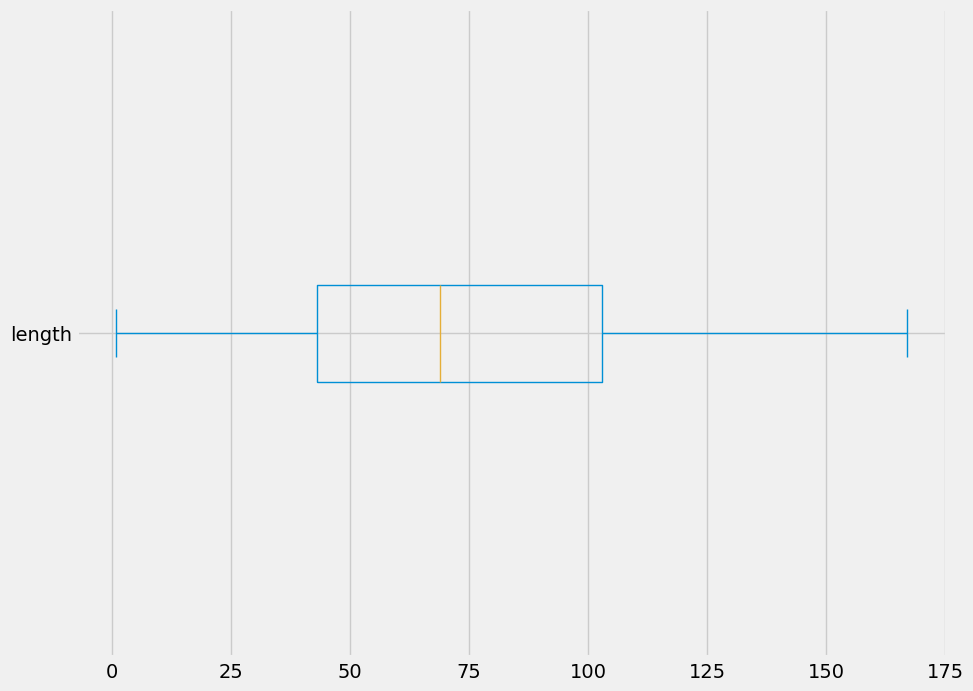

In [85]:
# For the horizontal box plot
df['length'].plot(kind='box', vert=False)
plt.show()  # To display the plot

The plotted histogram is used to represent the distribution of numerical data by dividing the data into bins or intervals and counting the number of observations in each bin.

<Axes: ylabel='Frequency'>

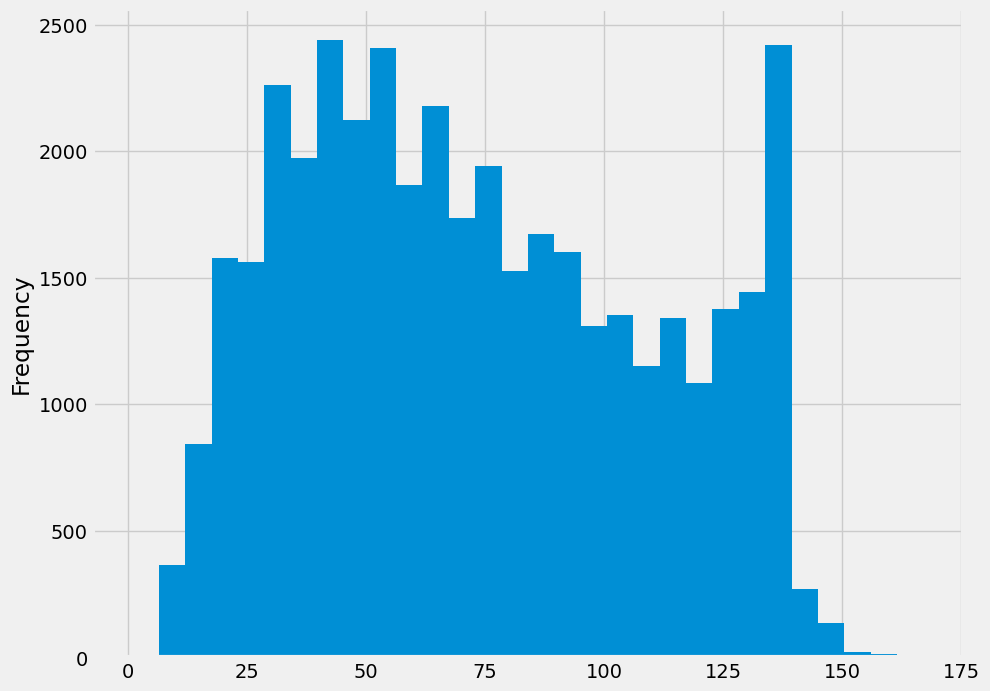

In [69]:
df['length'].plot(kind='hist', bins=30)

The code snippet is to create a box plot for the 'length' column, filtered by specific countries.

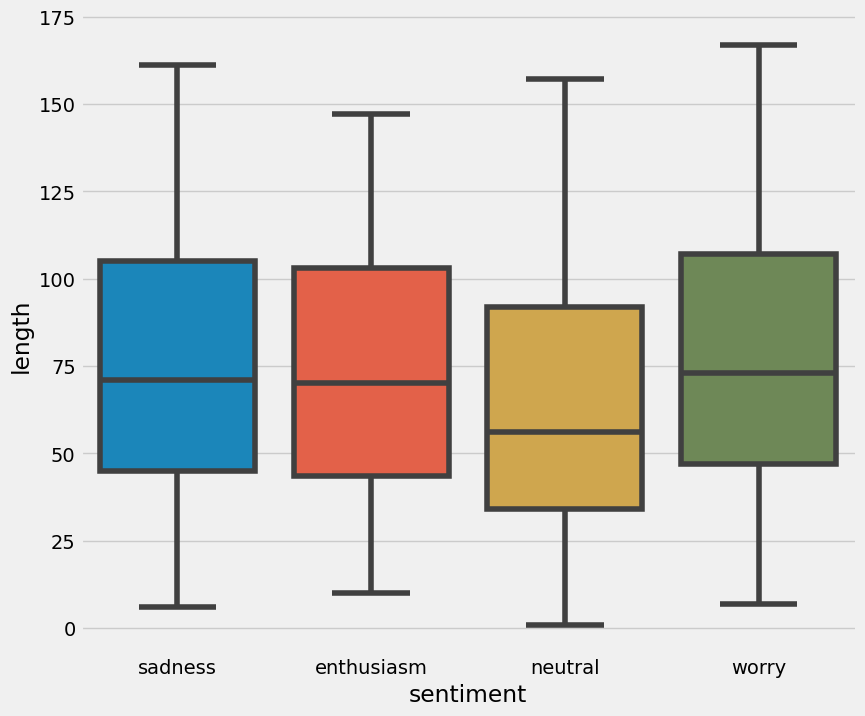

In [86]:
import seaborn as sns
where = df['sentiment'].isin(['sadness', 'enthusiasm', 'neutral', 'worry'])
g = sns.catplot(data=df[where], x="sentiment", y="length", kind='box')
g.fig.set_size_inches(10, 8)

Histogram for word count distribution by sentiment

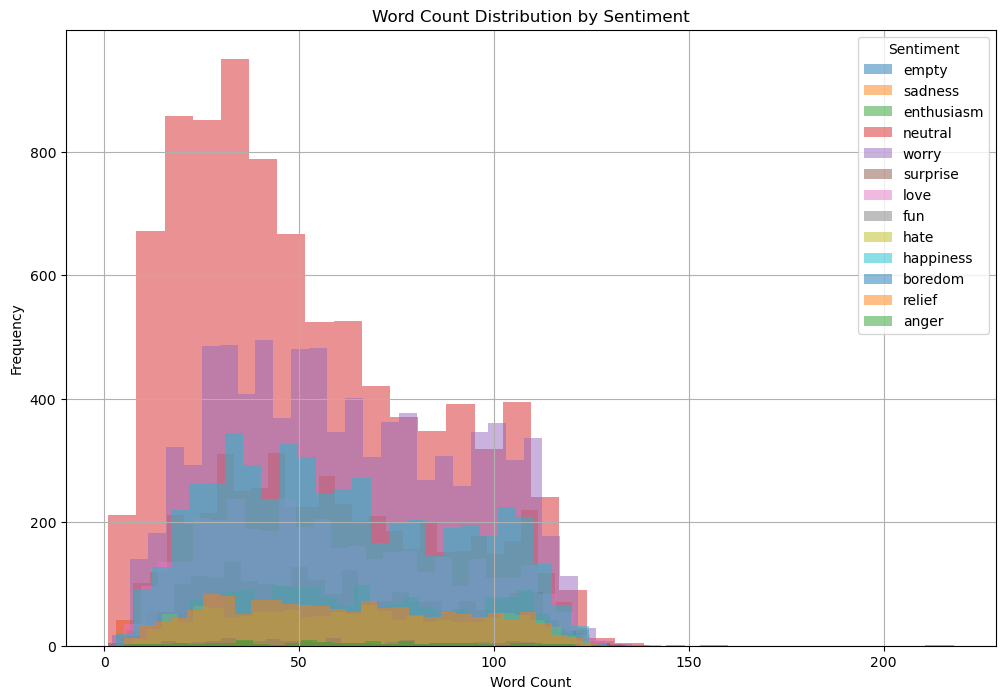

In [20]:

df['word_count'] = df['content_cleaned'].fillna('').apply(lambda x: len(str(x).split()))

# Create histograms for word counts again
plt.figure(figsize=(12, 8))
for sentiment in df['sentiment'].unique():
    subset = df[df['sentiment'] == sentiment]
    plt.hist(subset['word_count'], bins=30, alpha=0.5, label=sentiment)

plt.title('Word Count Distribution by Sentiment')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()


## To perform stop words which will use the list of English stop words

In [2]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'have', 'of', 'her', 'during', 'about', 'again', 'm', 'each', "won't", 'through', 'down', 'other', 'd', 'under', 'wouldn', 'yourself', "hadn't", 'itself', 'this', 'after', 'nor', 'such', "didn't", 'yours', 'not', "shouldn't", 'themselves', 've', 'some', 'our', 'i', 'has', 't', 'here', 'a', 'doesn', 'those', 'was', 'any', 'he', 'because', 'are', 'or', 'against', "aren't", 'is', 'now', 'didn', 'with', "isn't", 'and', "shan't", 'himself', 'same', 'out', 'very', 'don', "should've", 'no', 'doing', 're', 'why', 'only', "couldn't", 'been', 'ma', "don't", "hasn't", 'be', 'll', 'most', 'does', 'between', 'off', 'weren', 'they', 'then', 'do', 'at', 'up', 'me', 'being', 'to', 'ours', 'over', 'what', 'will', 'wasn', 'theirs', "it's", 'won', 'for', 'its', 'were', 'before', 'these', 'by', 'them', 'can', 'into', 'where', 'so', 'than', 's', "mightn't", 'once', "needn't", 'ain', 'own', 'from', 'o', 'couldn', 'hasn', 'aren', 'him', 'y', 'too', 'whom', "you'd", 'myself', 'the', 'shan', 'my', 'how', 'you

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsaiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
import regex as re
def tokenize(text):
    return re.findall(r'#\w+', text)


In [81]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [82]:
df['content_cleaned'] = df['content'].apply(remove_stop)
df[['content', 'content_cleaned']].head()

,content,content_cleaned
0,@tiffanylue i know i was listenin to bad habi...,"[@, f, f, n, l, u, e, , , k, n, w, , , , ..."
1,Layin n bed with a headache ughhhh...waitin o...,"[L, n, , n, , b, e, , w, h, , , h, e, c, ..."
2,Funeral ceremony...gloomy friday...,"[F, u, n, e, r, l, , c, e, r, e, n, ., ., ., ..."
3,wants to hang out with friends SOON!,"[w, n, , , h, n, g, , u, , w, h, , f, r, ..."
4,@dannycastillo We want to trade with someone w...,"[@, n, n, c, l, l, , W, e, , w, n, , , r, ..."


## Create a pipeline to read the data

In [28]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [29]:
df['tokens'] = df['content'].apply(prepare, pipeline=pipeline)

In [30]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,tweet_id,sentiment,content,content_cleaned,word_count,tokens,num_tokens
39995,1753918954,neutral,@JohnLloydTaylor,"[@, J, h, n, L, l, l, r]",8,[johnlloydtaylor],1
39996,1753919001,love,Happy Mothers Day All my love,"[H, p, p, , h, e, r, , , , l, l, , , l, ...",23,"[happy, mothers, day, love]",4
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,"[H, p, p, , h, e, r, ', , , , l, l, , h, ...",89,"[happy, mother, day, mommies, woman, man, long...",10
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,"[@, n, r, l, e, , W, U, P, , B, E, U, F, U, ...",99,"[niariley, wassup, beautiful, follow, peep, ne...",16
39999,1753919049,love,@mopedronin bullet train from tokyo the gf ...,"[@, p, e, r, n, n, , b, u, l, l, e, , r, n, ...",105,"[mopedronin, bullet, train, tokyo, gf, visitin...",13


In [75]:

df['tokens'] = df['content'].apply(lambda x: prepare(str(x), pipeline=pipeline))

# Display the DataFrame with the processed tokens
print(df[['content', 'tokens']].head())


                                             content  \
0  @tiffanylue i know  i was listenin to bad habi...   
1  Layin n bed with a headache  ughhhh...waitin o...   
2                Funeral ceremony...gloomy friday...   
3               wants to hang out with friends SOON!   
4  @dannycastillo We want to trade with someone w...   

                                              tokens  
0  [tiffanylue, know, listenin, bad, habit, earli...  
1    [layin, n, bed, headache, ughhhh, waitin, call]  
2                [funeral, ceremony, gloomy, friday]  
3                       [wants, hang, friends, soon]  
4  [dannycastillo, want, trade, someone, houston,...  


In [53]:
#count the tokens
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,tweet_id,sentiment,content,content_cleaned,word_count,tokens,num_tokens,processed_text,length
39995,1753918954,neutral,@JohnLloydTaylor,"[@, J, h, n, L, l, l, r]",8,[johnlloydtaylor],1,johnlloydtaylor,16
39996,1753919001,love,Happy Mothers Day All my love,"[H, p, p, , h, e, r, , , , l, l, , , l, ...",23,"[happy, mothers, day, love]",4,happy mothers day all my love,30
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,"[H, p, p, , h, e, r, ', , , , l, l, , h, ...",89,"[happy, mother, day, mommies, woman, man, long...",10,happy mothers day to all the mommies out there...,123
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,"[@, n, r, l, e, , W, U, P, , B, E, U, F, U, ...",99,"[niariley, wassup, beautiful, follow, peep, ne...",16,niariley wassup beautiful follow me peep out ...,122
39999,1753919049,love,@mopedronin bullet train from tokyo the gf ...,"[@, p, e, r, n, n, , b, u, l, l, e, , r, n, ...",105,"[mopedronin, bullet, train, tokyo, gf, visitin...",13,mopedronin bullet train from tokyo the gf a...,132


## Word frequency analysis

In [55]:
#Let’s count
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('day', 3084), ('good', 2304), ('get', 2011), ('like', 1934), ('quot', 1855)]


In [57]:
#Now, we put the word frequency in it’s own dataframe for analysis

freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
print(freq_df)

             freq
token            
tiffanylue      1
know         1355
listenin       10
bad           676
habit           6
...           ...
succesfully     1
ipsohot         1
sightseeing     1
gaijin          1
godzilla        1

[48618 rows x 1 columns]


In [58]:
#Lets sort and display

freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(15)

,freq
token,
day,3084
good,2304
get,2011
like,1934
quot,1855
http,1838
go,1818
today,1658
work,1638


In [59]:
freq_df.describe()

,freq
count,48618.000000
mean,6.322494
std,49.410498
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3084.000000


#### Bar chart between frequency and token

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

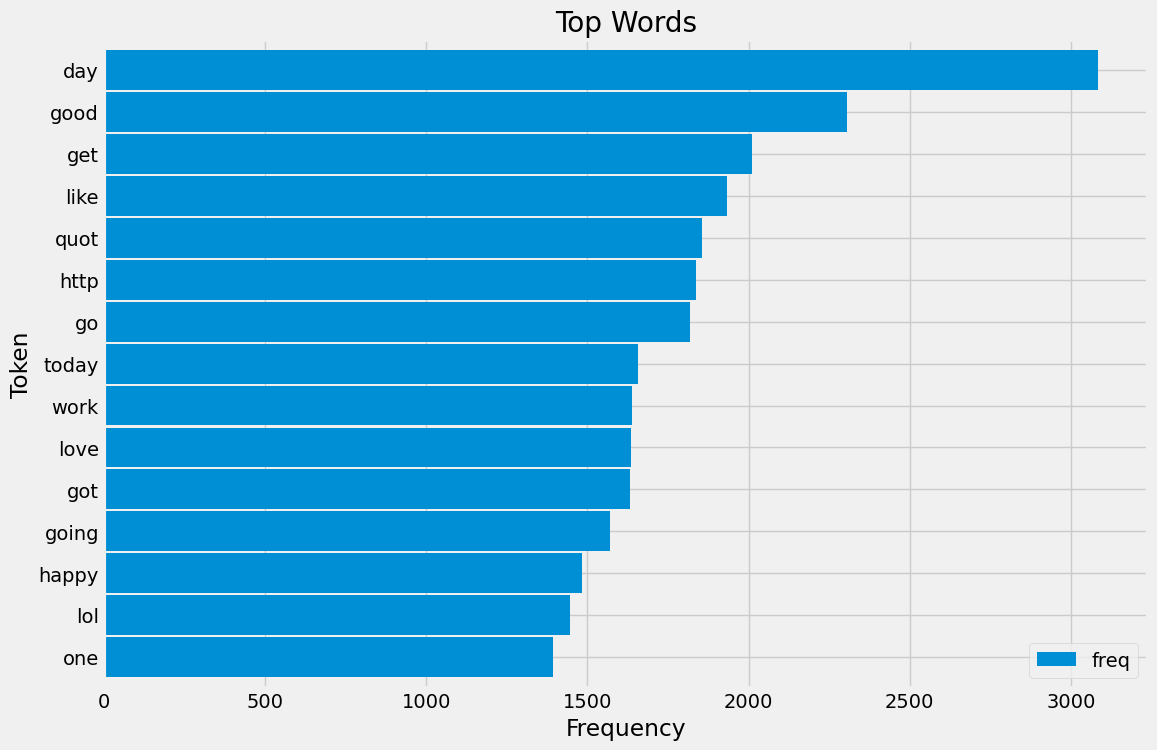

In [60]:
#Bar chart 

ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8),)
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

## To Pick 5 random strings which we will encounter in our day-to-day life and to write regex to identify them and sort

In [76]:
import re

# Sample strings
email_text = "Please contact us at user@example.com for more information."
date_text = "The deadline is 2024-04-27 for all submissions."
ipv4_text = "The server IP address is 192.168.1.1."
hex_text = "Memory address 0x1A3F was accessed."
scientific_notation_text = "The population of bacteria was estimated at 1.23e+10."

# Regex patterns
email_pattern = r'(\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b)'
date_pattern = r'(\b\d{4}-\d{2}-\d{2}\b)'
ipv4_pattern = r'(\b(?:\d{1,3}\.){3}\d{1,3}\b)'
hex_pattern = r'(\b0[xX][0-9a-fA-F]+\b)'
scientific_notation_pattern = r'([-+]?\b\d+\.?\d*(?:[eE][-+]?\d+)\b)'

# Finding matches
email_match = re.search(email_pattern, email_text)
date_match = re.search(date_pattern, date_text)
ipv4_match = re.search(ipv4_pattern, ipv4_text)
hex_match = re.search(hex_pattern, hex_text)
scientific_notation_match = re.search(scientific_notation_pattern, scientific_notation_text)

# Print results
print("Email found:", email_match.group(0) if email_match else "No match")
print("Date found:", date_match.group(0) if date_match else "No match")
print("IPv4 found:", ipv4_match.group(0) if ipv4_match else "No match")
print("Hexadecimal found:", hex_match.group(0) if hex_match else "No match")
print("Scientific notation found:", scientific_notation_match.group(0) if scientific_notation_match else "No match")


Email found: user@example.com
Date found: 2024-04-27
IPv4 found: 192.168.1.1
Hexadecimal found: 0x1A3F
Scientific notation found: 1.23e+10


## Sentiment analysis

In [77]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['content'].apply(getSubjectivity)
df['Polarity'] = df['content'].apply(getPolarity)

#Now display data
df.head()

,tweet_id,sentiment,content,content_cleaned,word_count,tokens,num_tokens,processed_text,length,Subjectivity,Polarity
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,"[@, f, f, n, l, u, e, , , k, n, w, , , , ...",72,"[tiffanylue, know, listenin, bad, habit, earli...",9,tiffanylue i know i was listenin to bad habit...,92,0.583333,-0.35
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,"[L, n, , n, , b, e, , w, h, , , h, e, c, ...",52,"[layin, n, bed, headache, ughhhh, waitin, call]",7,layin n bed with a headache ughhhhwaitin on y...,60,0.000000,0.00
2,1956967696,sadness,Funeral ceremony...gloomy friday...,"[F, u, n, e, r, l, , c, e, r, e, n, ., ., ., ...",25,"[funeral, ceremony, gloomy, friday]",4,funeral ceremonygloomy friday,35,0.000000,0.00
3,1956967789,enthusiasm,wants to hang out with friends SOON!,"[w, n, , , h, n, g, , u, , w, h, , f, r, ...",26,"[wants, hang, friends, soon]",4,wants to hang out with friends soon,36,0.100000,0.25
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"[@, n, n, c, l, l, , W, e, , w, n, , , r, ...",64,"[dannycastillo, want, trade, someone, houston,...",7,dannycastillo we want to trade with someone wh...,86,0.000000,0.00


#### To group the range of Polarity to different categories

In [78]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(50)

,tweet_id,sentiment,content,content_cleaned,word_count,tokens,num_tokens,processed_text,length,Subjectivity,Polarity,Insight
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,"[@, f, f, n, l, u, e, , , k, n, w, , , , ...",72,"[tiffanylue, know, listenin, bad, habit, earli...",9,tiffanylue i know i was listenin to bad habit...,92,0.583333,-0.350000,Negative
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,"[L, n, , n, , b, e, , w, h, , , h, e, c, ...",52,"[layin, n, bed, headache, ughhhh, waitin, call]",7,layin n bed with a headache ughhhhwaitin on y...,60,0.000000,0.000000,Neutral
2,1956967696,sadness,Funeral ceremony...gloomy friday...,"[F, u, n, e, r, l, , c, e, r, e, n, ., ., ., ...",25,"[funeral, ceremony, gloomy, friday]",4,funeral ceremonygloomy friday,35,0.000000,0.000000,Neutral
3,1956967789,enthusiasm,wants to hang out with friends SOON!,"[w, n, , , h, n, g, , u, , w, h, , f, r, ...",26,"[wants, hang, friends, soon]",4,wants to hang out with friends soon,36,0.100000,0.250000,Positive
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"[@, n, n, c, l, l, , W, e, , w, n, , , r, ...",64,"[dannycastillo, want, trade, someone, houston,...",7,dannycastillo we want to trade with someone wh...,86,0.000000,0.000000,Neutral
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,"[R, e, -, p, n, g, n, g, , @, g, h, r, h, 1, ...",66,"[re-pinging, ghostridah14, go, prom, bc, bf, l...",8,repinging ghostridah14 why didnt you go to pro...,84,0.000000,0.000000,Neutral
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...","[ , h, u, l, , b, e, , l, e, e, p, ,, , b, ...",110,"[sleep, im, thinking, old, friend, want, marri...",11,i should be sleep but im not thinking about an...,132,0.183333,0.220833,Positive
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,"[H, ., , h, p, :, /, /, w, w, w, ., j, h, e, ...",26,"[hmmm, http, www, djhero, com]",5,hmmm httpwwwdjherocom is down,36,0.288889,-0.155556,Negative
8,1956969035,sadness,@charviray Charlene my love. I miss you,"[@, c, h, r, v, r, , C, h, r, l, e, n, e, , ...",30,"[charviray, charlene, love, miss]",4,charviray charlene my love i miss you,39,0.600000,0.500000,Positive
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,"[@, k, e, l, c, u, c, h, , ', , r, r, , , ...",31,"[kelcouch, sorry, least, friday]",4,kelcouch im sorry at least its friday,42,0.700000,-0.400000,Negative


#### Data Visualization

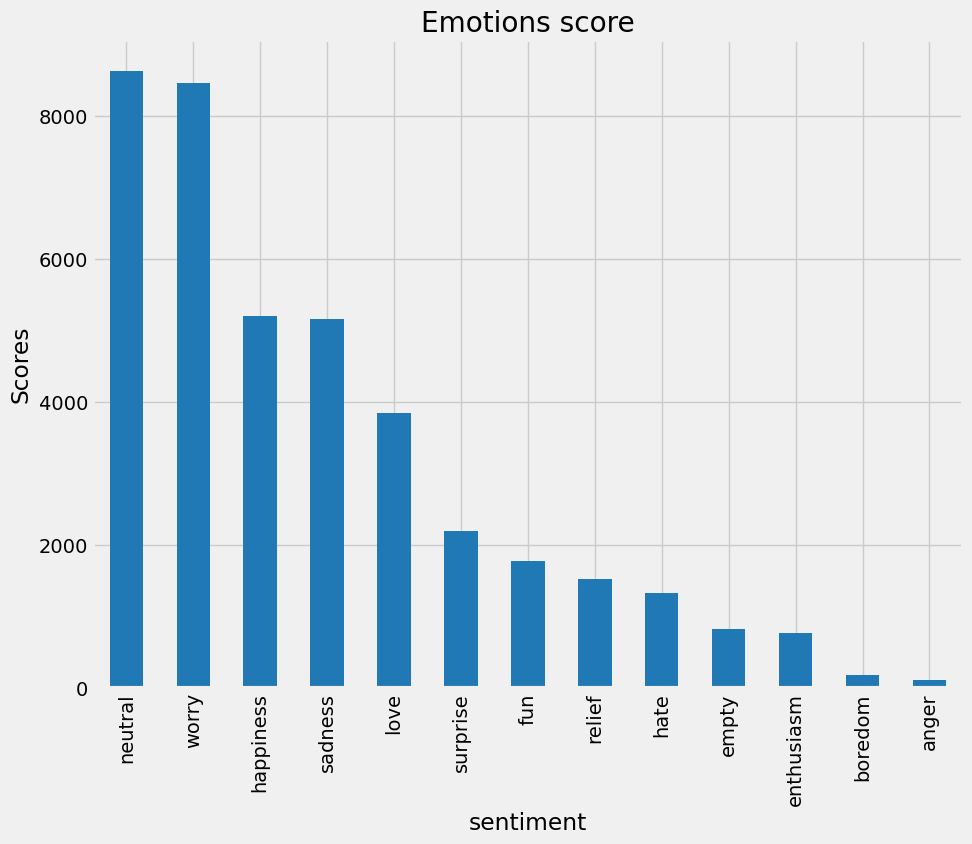

In [62]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# Set the plotting style
plt.style.use('fivethirtyeight')

#Plot the values count of sentiment
plt.title("Emotions score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["sentiment"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

#### To generate a word cloud

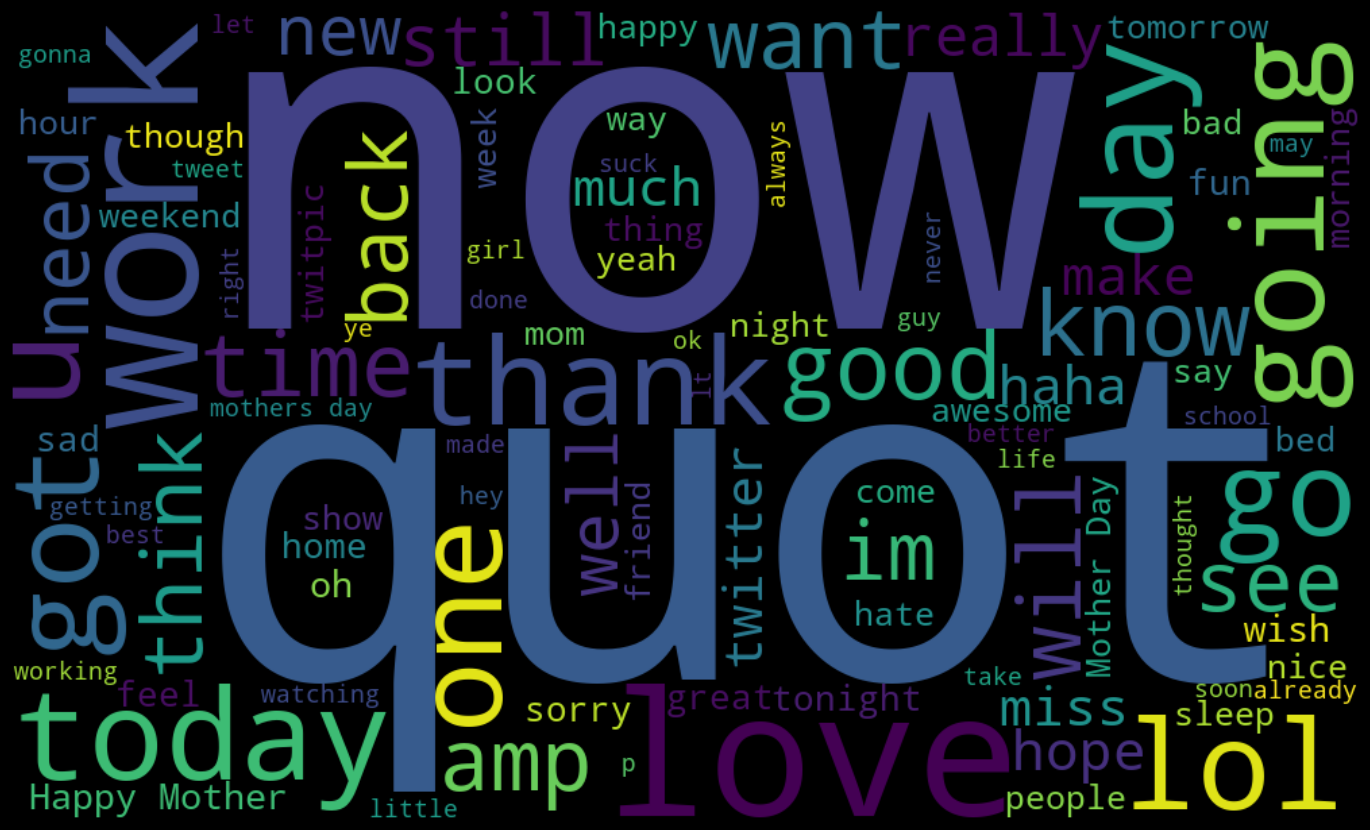

In [79]:
text = ' '.join( [twts for twts in df['content']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");